# Extract future heatwaves

Use the UK heatwave definition (3 days over 28C) to extract future heatwaves. First check each location for days above the threshold. Check for consecutive days above the threshold. Grab some general information about the heatwaves - frequency/duration/intensity - this will allow me to validate my method by comparing to previous regional changes work.

### Things to achieve in this notebook:

[✔] Extract heatwaves for one year

[✔] Loop over all years

[✔] Extract attributes

[✔] Check for robustness across locations

[✔] Compare to regional changes paper - First look

[✔] Check for robustness across model runs

[✔] Check modeled data against observered for the baseline period

### Import useful packages

In [11]:
from os import listdir
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extracting heatwaves and attributes (Future Weather)

In [12]:
column_names = ['model_run', 'year', 'location', 'hw_days', 'hw_events', 'hw_duration', 'hw_intensity']
df_att = pd.DataFrame(columns = column_names)

In [13]:
k = 0
filenames = listdir('./UKCP18/tasmax/')
for filename in filenames:
    df = pd.read_csv('./UKCP18/tasmax/'+filename)
    columns = df.columns.tolist()
    for column in columns:
        ## Extract the heatwaves
        df['thresh' + column] = np.where(df[column] >= 28, 1,0)
        # where it is either the first day of a heatwave or part of a heatwave
        length = len(df[column])
        array = np.zeros(length)
        for i in range(length):
            if sum(df['thresh' + column][i:i+3]) == 3:
                array[i] = 1
            elif df['thresh' + column][i] == 1 and array[i-1] ==1:
                array[i] = 1
        df['HW' + column] = array
        ## Extract attributes - number of heatwave days, number of events, peak temperature, duration of longest heatwave
        hw_days = sum(array)
        hw_events = 0
        hw_duration = 0
        hw_intensity = 0
        for i in range(len(array)):
            counter = 0
            if array[i] == 1 and array[i-1] == 0:
                hw_events = hw_events + 1
                value = 1
                j = i
                while value == 1:
                    counter = counter + 1
                    value = array[j]
                    j = j + 1
                if counter > hw_duration:
                    hw_duration = counter - 1
            if array[i] == 1:
                temp = df[column][i]
                if temp > hw_intensity:
                    hw_intensity = round(temp, 2)
        row = [filename[31:33], filename[38:42], column, hw_days, hw_events, hw_duration, hw_intensity]
        df_att.loc[k] = row
        k = k+1

## Comparing different locations


In [14]:
grouped = tuple(df_att.groupby('location'))
# Location 1
print(grouped[0][1]['hw_days'].mean())
print(grouped[0][1]['hw_events'].mean())
x = (grouped[0][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[0][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

0.12916666666666668
0.0375
3.4444444444444446
30.449999999999996


In [15]:
# Location 2
print(grouped[1][1]['hw_days'].mean())
print(grouped[1][1]['hw_events'].mean())
x = (grouped[1][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[1][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

1.8958333333333333
0.45
4.506849315068493
33.5158904109589


In [16]:
# Location 3
print(grouped[2][1]['hw_days'].mean())
print(grouped[2][1]['hw_events'].mean())
x = (grouped[2][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[2][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

7.391666666666667
1.3916666666666666
6.6050955414012735
34.15579617834395


In [17]:
# Location 4
print(grouped[3][1]['hw_days'].mean())
print(grouped[3][1]['hw_events'].mean())
x = (grouped[3][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[3][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

6.1375
1.1875
6.178082191780822
33.771506849315074


In [18]:
# Location 5
print(grouped[4][1]['hw_days'].mean())
print(grouped[4][1]['hw_events'].mean())
x = (grouped[4][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[4][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

7.675
1.4416666666666667
6.7215189873417724
34.95303797468355


There appears to be a fair amount of variation across the locations - Could be that the first two are less central/wrong? - Check this out.

## Compare to regional changes data

Check out the expected changes under the regional data. How does my output compare?

#### Extract heatwaves and attributes (observed weather)

In [23]:
column_names = ['year', 'hw_days', 'hw_events', 'hw_duration', 'hw_intensity']
df_att_base = pd.DataFrame(columns = column_names)

In [27]:
k = 0
filenames = listdir('./midas_annual/')
for filename in filenames:
    if filename.endswith('.csv'):
        df = pd.read_csv('./midas_annual/'+filename, header = None)
        ## Extract the heatwaves
        df['thresh'] = np.where(df[2] >= 28, 1,0)
        # where it is either the first day of a heatwave or part of a heatwave
        length = len(df[2])
        array = np.zeros(length)
        for i in range(length):
            if sum(df['thresh'][i:i+3]) == 3:
                array[i] = 1
            elif df['thresh'][i] == 1 and array[i-1] ==1:
                array[i] = 1
        df['HW'] = array
        ## Extract attributes - number of heatwave days, number of events, peak temperature, duration of longest heatwave
        hw_days = sum(array)
        hw_events = 0
        hw_duration = 0
        hw_intensity = 0
        for i in range(len(array)):
            counter = 0
            if array[i] == 1 and array[i-1] == 0:
                hw_events = hw_events + 1
                value = 1
                j = i
                while value == 1:
                    counter = counter + 1
                    value = array[j]
                    j = j + 1
                if counter > hw_duration:
                    hw_duration = counter - 1
            if array[i] == 1:
                temp = df[2][i]
                if temp > hw_intensity:
                    hw_intensity = round(temp, 2)
        row = [filename[0:3], hw_days, hw_events, hw_duration, hw_intensity]
        df_att_base.loc[k] = row
        k = k+1

In [28]:
print(df_att_base['hw_days'].mean())
print(df_att_base['hw_events'].mean())
x = (df_att_base['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (df_att_base['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

2.3
0.4666666666666667
6.0
32.24444444444445


**Baseline Period**

- Number of heatwave days: **2.3**

- Number of events: **0.47**

- Duration of longest event: **6.0**

- Peak intensity: **32.24**

**Change Equations with Parameters**

$ HW_{days} = 2.3 + 16.1^*\delta T $

$ HW_{events} = 0.47 + 1.3^*\delta T $

$ HW_{duration} = 6.0 + 4.2^*\delta T $

$ HW_{intensity} = 32.24 + 1.5^*\delta T $

**Global warming projection**

By 2060 we can expect 3C of global warming under RCP8.5 (see supplimentary material for regional changes paper - There's a nice graph). The baseline period in 1961-1990 so 0.5C of change relative to preindustrial levels had already occurred.

**Projected attributed from paper**

$ HW_{days} = 2.3 + 16.1(7.4,25.1)^*2.5 = 42.55 (20.8,  65.05)$

$ HW_{events} = 0.47 + 1.3(0.3,2.2)^*2.5 = 3.72 (1.22, 5.97)$

$ HW_{duration} = 6.0 + 4.2(1.9,13)^*2.5 = 16.5  (10.75, 38.5)$

$ HW_{intensity} = 32.24 + 1.5(0.6,2.4)^*2.5 = 35.99 (33.74, 38.24)$

**Need to change values**

**Attributes from UKCP18**

- Number of heatwave days: **7.68**

- Number of events: **1.44**

- Duration of longest event: **6.72**

- Peak intensity: **34.95**

Only peak temperature and number of events are within the range - durations are less, this may be due to a lower heatwave threshold in the paper, making each heatwave longer (bringing in days from either side) and so increasing total heatwave days too. This is likely the case as the threshold changes over time of year so there will likely be larger less severe heatwaves in Spring.

In [29]:
par1 = np.array([16.1, 7.4, 25.1])
par2 = np.array([1.3, 0.3, 2.2])
par3 = np.array([4.2, 1.9, 13])
par4 = np.array([1.5, 0.6, 2.4])

print(2.3 + par1*2.5)

print(0.47 + par2*2.5)

print(6.0 + par3*2.5)

print(32.24 + par4*2.5)


[42.55 20.8  65.05]
[3.72 1.22 5.97]
[16.5  10.75 38.5 ]
[35.99 33.74 38.24]


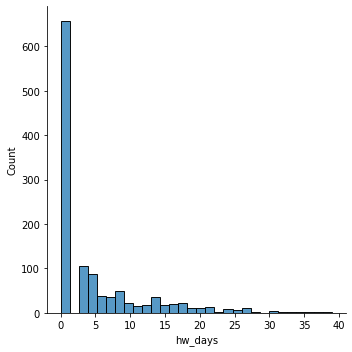

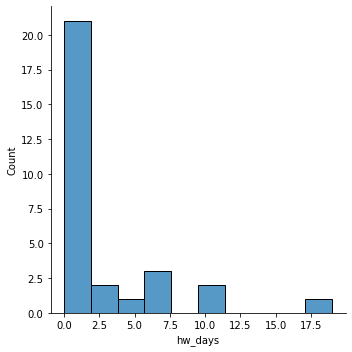

In [56]:
sns.displot(df_att['hw_days'])#, hist = False)
sns.displot(df_att_base['hw_days'])#, hist = False)

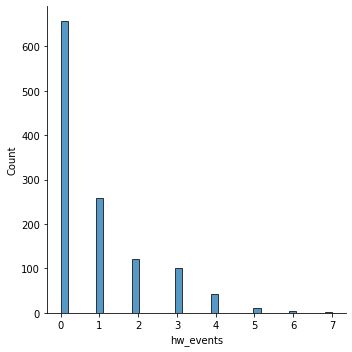

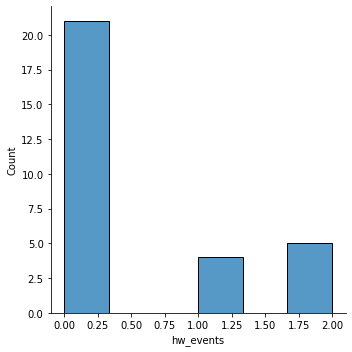

In [57]:
sns.displot(df_att['hw_events'])#, hist = False)
sns.displot(df_att_base['hw_events'])#, hist = False)

In [66]:
print(df_att['hw_events'].astype(bool).sum(axis=0)/len(df_att['hw_events'])*100, '%')

45.25 %


In [67]:
print(df_att_base['hw_events'].astype(bool).sum(axis=0)/len(df_att_base['hw_events'])*100, '%')

30.0 %


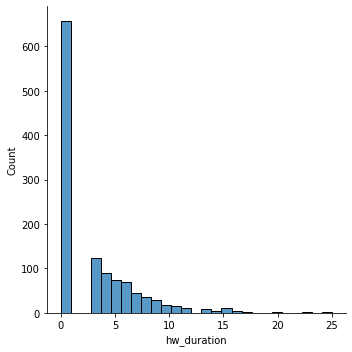

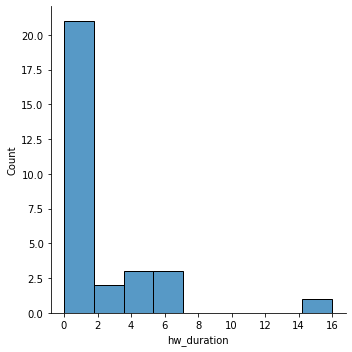

In [60]:
sns.displot(df_att['hw_duration'])#, hist = False)
sns.displot(df_att_base['hw_duration'])#, hist = False)

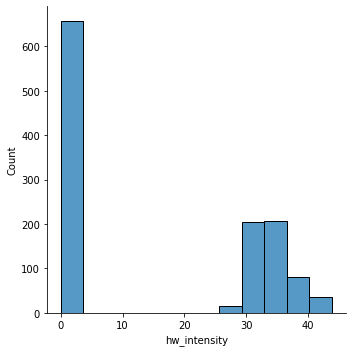

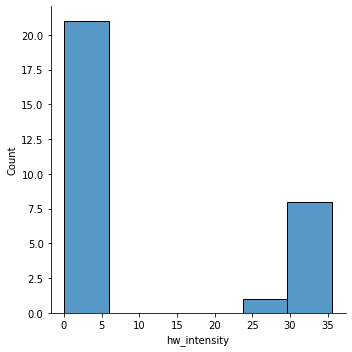

In [59]:
sns.displot(df_att['hw_intensity'])#, hist = False)
sns.displot(df_att_base['hw_intensity'])#, hist = False)

## Model runs

In [44]:
grouped = tuple(df_att.groupby('model_run'))
days = np.zeros(12)
events = np.zeros(12)
duration = np.zeros(12)
intensity = np.zeros(12)
for model_run in range(12):
    days[model_run] = grouped[model_run][1]['hw_days'].mean()
    events[model_run] = grouped[model_run][1]['hw_events'].mean()
    x = (grouped[model_run][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
    duration[model_run] = np.nanmean(x)
    x = (grouped[model_run][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
    intensity[model_run] = np.nanmean(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


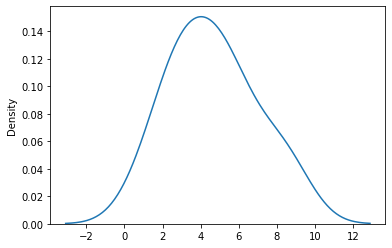

In [49]:
sns.distplot(days, hist = False)
# Number of heatwave days: 7.68

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


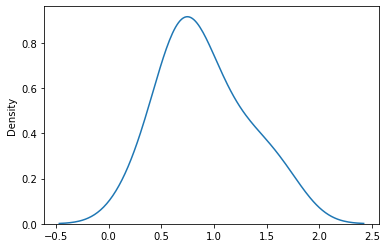

In [50]:
sns.distplot(events, hist = False)
# Number of events: 1.44

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


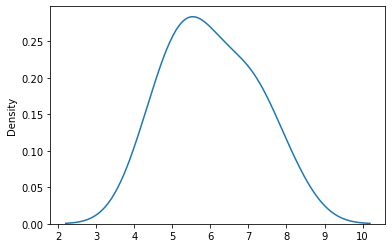

In [52]:
sns.distplot(duration, hist = False)
# Duration of longest event: 6.72

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


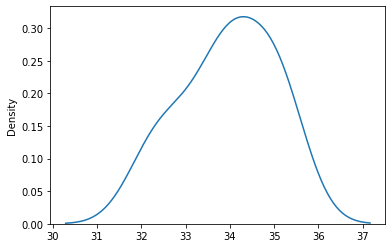

In [53]:
sns.distplot(intensity, hist = False)
# Peak intensity: 34.95

## Modeled vs Observed data

Heatwave attributed for modeled data 1980-2000:

In [75]:
column_names = ['model_run', 'year', 'location', 'hw_days', 'hw_events', 'hw_duration', 'hw_intensity']
df_att_mod = pd.DataFrame(columns = column_names)

In [84]:
k = 0
filenames = listdir('./UKCP18/tasmax_base/')
for filename in filenames:
    if filename.endswith('.csv'):
        df = pd.read_csv('./UKCP18/tasmax_base/'+filename)
        columns = df.columns.tolist()
        for column in columns:
            ## Extract the heatwaves
            df['thresh' + column] = np.where(df[column] >= 28, 1,0)
            # where it is either the first day of a heatwave or part of a heatwave
            length = len(df[column])
            array = np.zeros(length)
            for i in range(length):
                if sum(df['thresh' + column][i:i+3]) == 3:
                    array[i] = 1
                elif df['thresh' + column][i] == 1 and array[i-1] ==1:
                    array[i] = 1
            df['HW' + column] = array
            ## Extract attributes - number of heatwave days, number of events, peak temperature, duration of longest heatwave
            hw_days = sum(array)
            hw_events = 0
            hw_duration = 0
            hw_intensity = 0
            for i in range(len(array)):
                counter = 0
                if array[i] == 1 and array[i-1] == 0:
                    hw_events = hw_events + 1
                    value = 1
                    j = i
                    while value == 1:
                        counter = counter + 1
                        value = array[j]
                        j = j + 1
                    if counter > hw_duration:
                        hw_duration = counter - 1
                if array[i] == 1:
                    temp = df[column][i]
                    if temp > hw_intensity:
                        hw_intensity = round(temp, 2)
            row = [filename[31:33], filename[38:42], column, hw_days, hw_events, hw_duration, hw_intensity]
            df_att_mod.loc[k] = row
            k = k+1

In [106]:
grouped = tuple(df_att_mod.groupby('model_run'))
grouped = tuple(grouped[0][1].groupby('location'))
# Location 1
print(grouped[0][1]['hw_days'].mean())
print(grouped[0][1]['hw_events'].mean())
x = (grouped[0][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[0][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

0.0
0.0
nan
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [107]:
grouped = tuple(df_att_mod.groupby('location'))
# Location 2
print(grouped[1][1]['hw_days'].mean())
print(grouped[1][1]['hw_events'].mean())
x = (grouped[1][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[1][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

0.058333333333333334
0.016666666666666666
3.5
31.97


In [108]:
grouped = tuple(df_att_mod.groupby('location'))
# Location 3
print(grouped[2][1]['hw_days'].mean())
print(grouped[2][1]['hw_events'].mean())
x = (grouped[2][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[2][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

0.025
0.008333333333333333
3.0
32.1


In [109]:
grouped = tuple(df_att_mod.groupby('location'))
# Location 4
print(grouped[3][1]['hw_days'].mean())
print(grouped[3][1]['hw_events'].mean())
x = (grouped[3][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[3][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

0.025
0.008333333333333333
3.0
31.09


In [110]:
grouped = tuple(df_att_mod.groupby('location'))
# Location 5
print(grouped[4][1]['hw_days'].mean())
print(grouped[4][1]['hw_events'].mean())
x = (grouped[4][1]['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (grouped[4][1]['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

0.075
0.016666666666666666
4.5
31.085


Observed weather for the same period:

In [95]:
column_names = ['year', 'hw_days', 'hw_events', 'hw_duration', 'hw_intensity']
df_att_obv = pd.DataFrame(columns = column_names)

In [96]:
k = 0
filenames = listdir('./observed_weather/')
for filename in filenames:
    if filename.startswith(('198', '199')):
        df = pd.read_csv('./observed_weather/'+filename, header = None)
        ## Extract the heatwaves
        df['thresh'] = np.where(df[2] >= 28, 1,0)
        # where it is either the first day of a heatwave or part of a heatwave
        length = len(df[2])
        array = np.zeros(length)
        for i in range(length):
            if sum(df['thresh'][i:i+3]) == 3:
                array[i] = 1
            elif df['thresh'][i] == 1 and array[i-1] ==1:
                array[i] = 1
        df['HW'] = array
        ## Extract attributes - number of heatwave days, number of events, peak temperature, duration of longest heatwave
        hw_days = sum(array)
        hw_events = 0
        hw_duration = 0
        hw_intensity = 0
        for i in range(len(array)):
            counter = 0
            if array[i] == 1 and array[i-1] == 0:
                hw_events = hw_events + 1
                value = 1
                j = i
                while value == 1:
                    counter = counter + 1
                    value = array[j]
                    j = j + 1
                if counter > hw_duration:
                    hw_duration = counter - 1
            if array[i] == 1:
                temp = df[2][i]
                if temp > hw_intensity:
                    hw_intensity = round(temp, 2)
        row = [filename[0:3], hw_days, hw_events, hw_duration, hw_intensity]
        df_att_base.loc[k] = row
        k = k+1

In [97]:
print(df_att_base['hw_days'].mean())
print(df_att_base['hw_events'].mean())
x = (df_att_base['hw_duration'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))
x = (df_att_base['hw_intensity'].replace(0, np.NaN)).to_numpy()
print(np.nanmean(x))

3.1
0.6666666666666666
5.538461538461538
32.23076923076923
